## Comparisons of Q-learning and Double Q-learning

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
states = ['A', 'B']
epsilon = 0.1 
alpha = 0.1 
np.random.seed(2025)

In [3]:
def transition(s, a):
    if s == 'A':
        if a == 'R':
            r = 0
            s = 'T'
        else:
            s = 'B'
            r = 0 
    else:
        r = np.random.randn() - 0.1 
        # r = np.random.randn() - 1 
        s = 'T'
    
    return s, r 

In [4]:
n_actions_B = 10

In [5]:
Qs = {
    'A': {'L': 0, 'R': 0},
    'B': {f'a{k}': 0 for k in np.arange(n_actions_B)},
    'T': 0
}

In [6]:
Qs 

{'A': {'L': 0, 'R': 0},
 'B': {'a0': 0,
  'a1': 0,
  'a2': 0,
  'a3': 0,
  'a4': 0,
  'a5': 0,
  'a6': 0,
  'a7': 0,
  'a8': 0,
  'a9': 0},
 'T': 0}

In [7]:
def action(s, Qs):
    randnum = np.random.rand()
    actions = list(Qs[s].keys()) 

    if randnum > epsilon:
        vals = list(Qs[s].values())
        # a = actions[np.random.choice([aI for aI, val in enumerate(vals) if val == np.max(vals)])]
        a = actions[np.argmax(vals)]
    else:
        a = np.random.choice(actions)
    return a 

In [8]:
# Q-learning 

n_episodes = 300
n_runs = 1000
L_prop_runs = [] 

for runI in np.arange(n_runs): 
    L_prop = np.zeros(n_episodes)    

    Qs = {
        'A': {'L': 0, 'R': 0},
        'B': {f'a{k}': 0 for k in np.arange(n_actions_B)},
        'T': {'a': 0}
    }

    # Qs = {
    #     'A': {'L': np.random.rand(), 'R': np.random.rand()},
    #     'B': {f'a{k}': np.random.rand() for k in np.arange(n_actions_B)},
    #     'T': {'a': 0}
    # }
    
    for episodeI in np.arange(n_episodes):
        s = 'A' 
        n_actions = 0 
        n_L = 0 

        while s != 'T':        
            a = action(s, Qs)
            s_prime, r = transition(s, a) 
            
            Qs[s][a] = Qs[s][a] + alpha * (r + np.max(list(Qs[s_prime].values())) - Qs[s][a])

            if a == 'L':
                n_L += 1
            
            print(f'{s}-{a}-{r}', end='-')

            n_actions += 1 
            s = s_prime 
        
        L_prop[episodeI] = n_L / n_actions
        print()

    L_prop_runs.append(L_prop) 

L_prop_runs = np.array(L_prop_runs) 

A-L-0-B-a0--0.19239017734006542-
A-L-0-B-a1-0.634285571818207-
A-L-0-B-a1-1.293708086434868-
A-L-0-B-a1--0.30737113206185906-
A-R-0-
A-L-0-B-a1--1.1414961740454705-
A-L-0-B-a1--0.9280760893682218-
A-L-0-B-a2-0.05819335462130032-
A-L-0-B-a1--1.889323047251889-
A-L-0-B-a2--0.3598197618057696-
A-L-0-B-a3--1.9032091484590572-
A-L-0-B-a4-1.319880136544059-
A-L-0-B-a4--0.10182386771671138-
A-L-0-B-a4--0.8418935944226853-
A-L-0-B-a4--0.4001400353475164-
A-L-0-B-a5--0.6135461678858296-
A-L-0-B-a6--0.32915041669742395-
A-L-0-B-a7--1.7527878289924952-
A-L-0-B-a8--0.4908954602905612-
A-L-0-B-a9--0.338546489517417-
A-L-0-B-a0--1.396095249621734-
A-L-0-B-a4-0.8109040117002285-
A-L-0-B-a8-0.6066841427202211-
A-R-0-
A-L-0-B-a4-0.39141028508580833-
A-L-0-B-a4-0.8757185009192724-
A-L-0-B-a4-0.04497303704888106-
A-L-0-B-a4--0.4740713435420293-
A-L-0-B-a4--0.15816853290670468-
A-L-0-B-a4--0.6147315478616149-
A-L-0-B-a8-0.533987963057496-
A-L-0-B-a8--0.21314332889004167-
A-L-0-B-a8--1.0688643898383063-
A-

In [9]:
Qs 

{'A': {'L': -0.02264122020009491, 'R': 0.0},
 'B': {'a0': -0.1626826213081537,
  'a1': -0.1774308507883471,
  'a2': -0.180834873157568,
  'a3': -0.11410759152850372,
  'a4': -0.27644668189536387,
  'a5': -0.18111317610013714,
  'a6': -0.1268115712889797,
  'a7': -0.13666430125997736,
  'a8': -0.022170146231417692,
  'a9': -0.20894493289286312},
 'T': {'a': 0}}

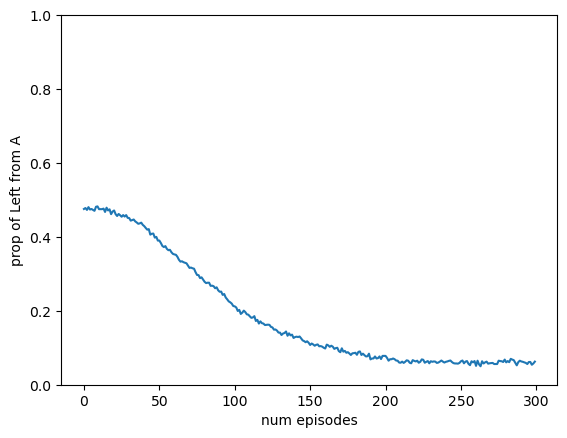

In [10]:
fig, ax = plt.subplots(1, 1)

ax.plot(L_prop_runs.mean(axis=0)) 
ax.set_xlabel('num episodes')
ax.set_ylabel('prop of Left from A')
ax.set_ylim([0, 1])
fig 

In [11]:
L_prop_runs.mean(axis=0)[0]

0.4755